* LightGBM은 XGBoost와 함께 부스팅 계열 알고리즘에서 가장 각광을 받고 있음<br>
* XGBoost는 매우 뛰어난 부스팅 알고리즘이지만 여전히 시간이 오래 걸림<br>
* XGBoost에서 GridSearchCV로 하이퍼 파라미터 튜닝을 수행하다 보면 수행 시간이 너무 오래 걸려서 많은 파라미터 튜닝하기에 어려움이 있음<br>
* **LightGBM의 가장 큰 장점은 XGBoost보다 학습엥 걸리는 시간이 훨씬 적다는 점, 또한 메모리 사용량도 상대적으로 적음**
* XGBoost의 장점은 계승, 단점은 보완하는 방식으로 개발 됨.<br>
* **LightGBM의 한 가지 단점은 적은 데이터 세트에 적용할 경우 과적합이 발생하기 쉬움(일반적으로 10,000건 이하의 데이터 세트)**

* LightGBM은 일반 GBM 계열의 트리 분할 방법과 다르게 **리프 중심 트리 분할** 방식을 사용

기존의 대부분 트리 기반 알고리즘은 트리의 깊이를 효과적으로 줄이기 위한 균형 트리 분할 방식을 사용했었습니다. 즉, 최대한 균형 잡힌 트리를 유지하면서 분할하기 때문에 트리의 깊이가 최소화될 수 있었는데 이렇게 균형 잡힌 트리를 생성하는 이유는 오버피팅에 보다 더 강한 구조를 가질 수 있다고 알려져 있기 때문입니다. 반대로 그 균형을 맞추기 위한 시간이 필요하다는 상대적 단점이 존재합니다.

하지만, LightGBM의 리프 중심 트리 분할 방식은 트리의 균형을 맞추지 않고, 최대 손실 값(max delta loss)을 가지는 리프 노드를 지속적으로 분할하면서 트리의 깊이가 깊어지고 비대칭적인 규칙 트리가 생성 됩니다. 하지만 이렇게 최대 손실값을 가지는 리프 노드를 지속적으로 분할해 생성된 규칙 트리는 학습을 반복할수록 결국은 균형 트리 분할 방식보다 예측 오류 손실을 최소화 할 수있습니다.

#### LightGBMd의 XGBoost 대비 장점
* 더 빠른 학습과 예측 수행 시간
* 더 작은 메모리 사용량
* 카테고리형 피처의 자동 변환과 최적 분할(원-핫 인코딩 등을 사용하지 않고도 카테고리형 피처를 최적으로 변환하고 이에 따른 노드 분할 수행)

* XGBoost와 마찬가지로 대용량 데이터에 대한 뛰어난 예측 성능 및 병렬 컴퓨팅 기능을 제공하고 있으며, 최근엔 **GPU까지 지원**

## 4.7.1 LightGBM 설치

* Windows 환경에서 설치 시 Visual Studio Build tool 2015 이상이 설치돼 있어야 함.

``` bash
 $ conda install -c conda-forge lightgbm
```
## 4.7.2 LightGBM 하이퍼 파라미터

XGBoost와 많은 부분이 유사

**_LightGBM은 XGBoost와 다르게 리프 노드가 계속 분할되면서 트리의 깊이가 깊어지므로 이러한 트리 특성에 맞는 하이퍼 파라미터 설정이 필요(예: max_depth를 매우 크게 가짐)_**

### 주요 파라미터
* num_iterations (default=100) : 반복 수행하려는 트리의 개수 지정, n_estimators와 같은 파라미터. 너무 크게 지정하면 과적합 발생
* learning_rate (default=0.1) : 학습률, 기존 learning_rate와 설명 동일
* max_depth (default=-1) : 트리 기반 알고리즘 max_depth와 동일, 0보다 작은 값을 지정하면 깊이에 제한이 없음.
* min_data_in_leaf (default=20) : 결정 트리의 min_samples_leaf와 같은 파라미터. 최종 결정 클래스인 리프 노드가 되기 위해서 최소한으로 필요한 레코드 수, 과적합 제어를 위한 파라미터
* num_leaves (default=31) : 하나의 트리가 가질 수 있는 최대 리프 개수
* boosting (default=gbdt) : 부스팅의 트리를 생성하는 알고리즘 (gbdt:일반적인 그래디언트 부스팅 결정 트리, rf : 랜덤포레스트)
* bagging_fraction (default=1.0) : 개별 트리를 학습할 때마다 무작위로 선택하는 피처의 비율. 과적합을 막기 위해 사용, GBM의 max_features와 유사, XGB의 colsample_bytree와 같음.
* lambda_l2(default=0.0) : L2 Regularization 제어를 위한 값. XGB의 reg_lambda와 동일
* lambda_l1(default=0.0) : L1 Regularization 제어를 위한 값. XGB의 reg_alpha와 동일

### Learning Task 파라미터
* objective : 최솟값을 가져야 할 손실함수를 정의

## 4.7.2 하이퍼 파라미터 튜닝 방안

**num_leaves의 개수를 중심으로 min_child_samples(min_data_in_leaf), max_depth를 함께 조정하면서 모델의 복잡도를 줄이는 것이 기본 튜닝 방안**

* num_leaves는 개별 트리가 가질 수 있는 최대 리프의 개수이고 LightGBM의 복잡도를 제어하는 주요 파라미터, 높이면 정확도가 높아지지만, 반대로 트리의 깊이가 깊어지고 모델이 복잡도가 커져 과적합 영향도가 커짐
* min_data_in_leaf는 사이킷런 클래스에서는 min_child_samples. 과적합을 개선하기 위한 중요 파라미터. 큰 값으로 설정하면 트리가 깊어지는 것을 방지
* max_depth는 명시적으로 깊이의 크기를 제한. 위 두개 파라미터와 결합해 과적합을 개선하는 데 사용

**learning_rate를 작게하면서 n_estimators를 크게 하는 것은 부스팅 계열 튜닝에서 가장 기본적인 튜닝 방안**

## 4.7.4 LightGBM 적용 - 위스콘신 유방암 예측

LightGBM의 파이썬 패키지인 lightgbm에서 LGBMClassifier를 임포트하여 사용

In [1]:
# LightGBM의 파이썬 패키지인 lightgbm에서 LGBMClassifier 임포트
from lightgbm import LGBMClassifier

import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

dataset = load_breast_cancer()
ftr = dataset.data
target = dataset.target

# 전체 데이터 중 80%는 학습용 데이터, 20%는 테스트용 데이터 추출
X_train, X_test, y_train, y_test=train_test_split(ftr, target, test_size=0.2, random_state=156 )

# 앞서 XGBoost와 동일하게 n_estimators는 400 설정. 
lgbm_wrapper = LGBMClassifier(n_estimators=400)

# LightGBM도 XGBoost와 동일하게 조기 중단 수행 가능. 
evals = [(X_test, y_test)]
lgbm_wrapper.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="logloss", 
                 eval_set=evals, verbose=True)
preds = lgbm_wrapper.predict(X_test)
pred_proba = lgbm_wrapper.predict_proba(X_test)[:, 1]

[1]	valid_0's binary_logloss: 0.565079
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.507451
[3]	valid_0's binary_logloss: 0.458489
[4]	valid_0's binary_logloss: 0.417481
[5]	valid_0's binary_logloss: 0.385507
[6]	valid_0's binary_logloss: 0.355846
[7]	valid_0's binary_logloss: 0.330897
[8]	valid_0's binary_logloss: 0.306923
[9]	valid_0's binary_logloss: 0.28776
[10]	valid_0's binary_logloss: 0.26917
[11]	valid_0's binary_logloss: 0.250954
[12]	valid_0's binary_logloss: 0.23847
[13]	valid_0's binary_logloss: 0.225865
[14]	valid_0's binary_logloss: 0.215076
[15]	valid_0's binary_logloss: 0.205996
[16]	valid_0's binary_logloss: 0.196091
[17]	valid_0's binary_logloss: 0.186395
[18]	valid_0's binary_logloss: 0.17942
[19]	valid_0's binary_logloss: 0.174727
[20]	valid_0's binary_logloss: 0.168563
[21]	valid_0's binary_logloss: 0.165432
[22]	valid_0's binary_logloss: 0.160356
[23]	valid_0's binary_logloss: 0.155508
[24]	valid_0's binary_logloss: 

In [2]:

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [3]:
get_clf_eval(y_test, preds, pred_proba)

오차 행렬
[[33  4]
 [ 2 75]]
정확도: 0.9474, 정밀도: 0.9494, 재현율: 0.9740,    F1: 0.9615, AUC:0.9926


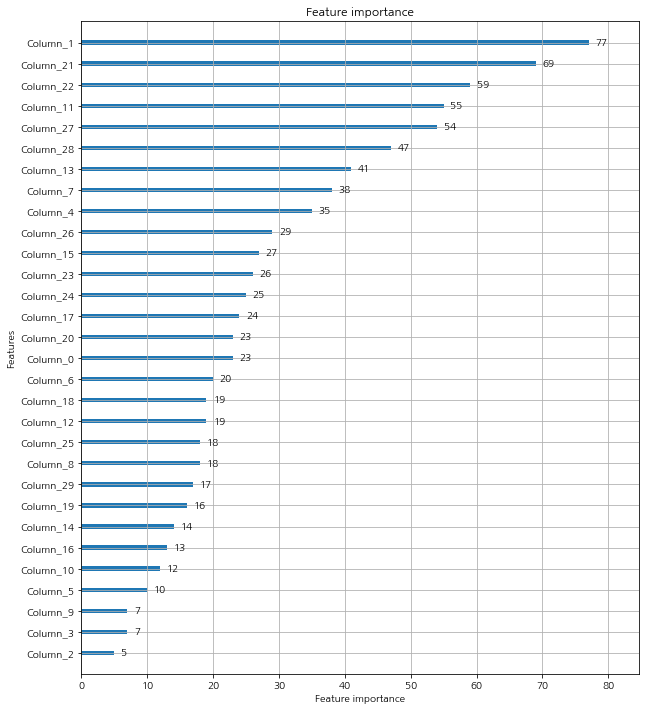

In [4]:

# plot_importance( )를 이용하여 feature 중요도 시각화
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(lgbm_wrapper, ax=ax)